In [1]:
import numpy as np
import pandas as pd
import pickle
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
from tqdm import tqdm
import nltk
import os
import random

In [2]:
#load needed dataframes:
#Dataframe with information about character game appearances:
with open('df_meta.pickle', 'rb') as f:
    df_meta = pickle.load(f)
#Dataframe with character text:
with open('df_text.pickle', 'rb') as f:
    df_text = pickle.load(f)
#Directed graph of all characters
with open('GCC.pickle', 'rb') as f:
    DG = pickle.load(f)

In [14]:
df_meta[df_meta.WC2==1]

Name WC1 WC2 WC2X WC3 WC3X WoW WoWBC WoWWotLK WoWC  \
150           Anduin_Lothar   1   1    0   0    0   0     0        0    0   
160     Terenas_Menethil_II   0   1    0   1    0   0     0        1    0   
162  Uther_the_Lightbringer   0   1    1   1    0   1     0        1    0   
171         Aiden_Perenolde   0   1    0   0    0   0     0        0    0   
191        Thoras_Trollbane   0   1    1   0    0   0     0        0    0   
203                Cho'gall   1   1    0   0    0   0     0        0    1   
209                 Gul'dan   1   1    0   0    1   0     1        0    0   
211       Orgrim_Doomhammer   0   1    1   0    0   0     0        0    0   
215         Kilrogg_Deadeye   1   1    1   0    0   0     0        0    0   
227     Zuluhed_the_Whacked   0   1    0   0    0   0     1        0    0   
229      Tagar_Spinebreaker   0   1    0   0    0   0     1        0    0   
258                 Zul'jin   0   1    0   0    0   0     1        0    0   

    WoWMoP WoWWoD WoWL WoWBfA WoWS WoWD  
150      0      0    1      0    0    0  
160      1      0    0      0    0    0  
162      0      0    1      0    1    0  
171      0      0    0      0    0    0  
191      0      0    1      0    0    0  
203      0      1    0      0    0    0  
209      0      1    1      1    0    0  
211      0      1    0      0    0    0  
215      0      1    0      0    0    0  
227      0      0    0      0    0    0  
229      0      1    0      0    0    0  
258      0      0    0      1    0    0

In [11]:
GWC1 = DG.subgraph(df_meta[df_meta.WC2==1]['Name'])
GWC1.nodes()

node_attr = nx.get_node_attributes(GWC1, "Affiliation")

# compute node size 
node_size = [d[1] for d in nx.degree(GWC1)]

# create colormap for Horde, Alliance, and other nodes
horde_nodes = [node for node in GWC1.nodes() if node_attr[node] == 'Horde']
alliance_nodes = [node for node in GWC1.nodes() if node_attr[node] == 'Alliance']
other_nodes = [node for node in GWC1.nodes() if node_attr[node] == 'Other' or node_attr[node] == '0']

color_map_horde = ["#E21A1A" for n in horde_nodes]
color_map_alliance = ["#1A1CE2" for n in alliance_nodes]
color_map_other = ["#9C9C9C" for n in other_nodes]

# create colormap for edges
color_a = '#E24343' # horde <-> horde
color_b = '#2350F5' # alliance <-> alliance
color_c = '#B413AF' # horde <-> alliance
color_d = '#AAAAAA' # else

edge_color = []
edge_alpha = []

for edge in GWC1.edges():
    from_, to_ = edge
    if node_attr[from_] == 'Horde' and node_attr[to_] == 'Horde':
        edge_color.append(color_a)
        edge_alpha.append(0.5)
    elif node_attr[from_] == 'Alliance' and node_attr[to_] == 'Alliance':
        edge_color.append(color_b)
        edge_alpha.append(0.5)
    elif node_attr[from_] == 'Alliance' and node_attr[to_] == 'Horde' or node_attr[from_] == 'Horde' and node_attr[to_] == 'Alliance':
        edge_color.append(color_c)
        edge_alpha.append(0.5)
    else:
        edge_color.append(color_d)
        edge_alpha.append(0.1)

# list containing node lists for each each Louvain attribute
nodeAtsDict = {}
for att in ['Horde', 'Alliance', 'Other']:
    nodesByAts = [x for x,y in GWC1.nodes(data=True) if y['Affiliation']==att]
    nodeAtsDict[att]=nodesByAts

In [12]:
    
at1_nodes = [node for node in GWC1.nodes() if GWC1.nodes[node]['Affiliation'] == 'Alliance']
at1_degs = [GWC1.degree[node] for node in GWC1.nodes() if GWC1.nodes[node]['Affiliation'] == 'Alliance']

at1_dict = {}
for i in range(len(at1_nodes)):
    at1_dict[at1_nodes[i]] = at1_degs[i]

print("Nodes in community 1 with largest node degree:")
print(sorted(at1_dict.items(), key=lambda x : x[1], reverse=True)[:5])

at1_nodes = [node for node in GWC1.nodes() if GWC1.nodes[node]['Affiliation'] == 'Horde']
at1_degs = [GWC1.degree[node] for node in GWC1.nodes() if GWC1.nodes[node]['Affiliation'] == 'Horde']

at1_dict = {}
for i in range(len(at1_nodes)):
    at1_dict[at1_nodes[i]] = at1_degs[i]

print("Nodes in community 1 with largest node degree:")
print(sorted(at1_dict.items(), key=lambda x : x[1], reverse=True)[:5])

Nodes in community 1 with largest node degree:
[]
Nodes in community 1 with largest node degree:
[('Orgrim_Doomhammer', 8)]


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5919.64it/s]


BarnesHut Approximation  took  0.02  seconds
Repulsion forces  took  0.06  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


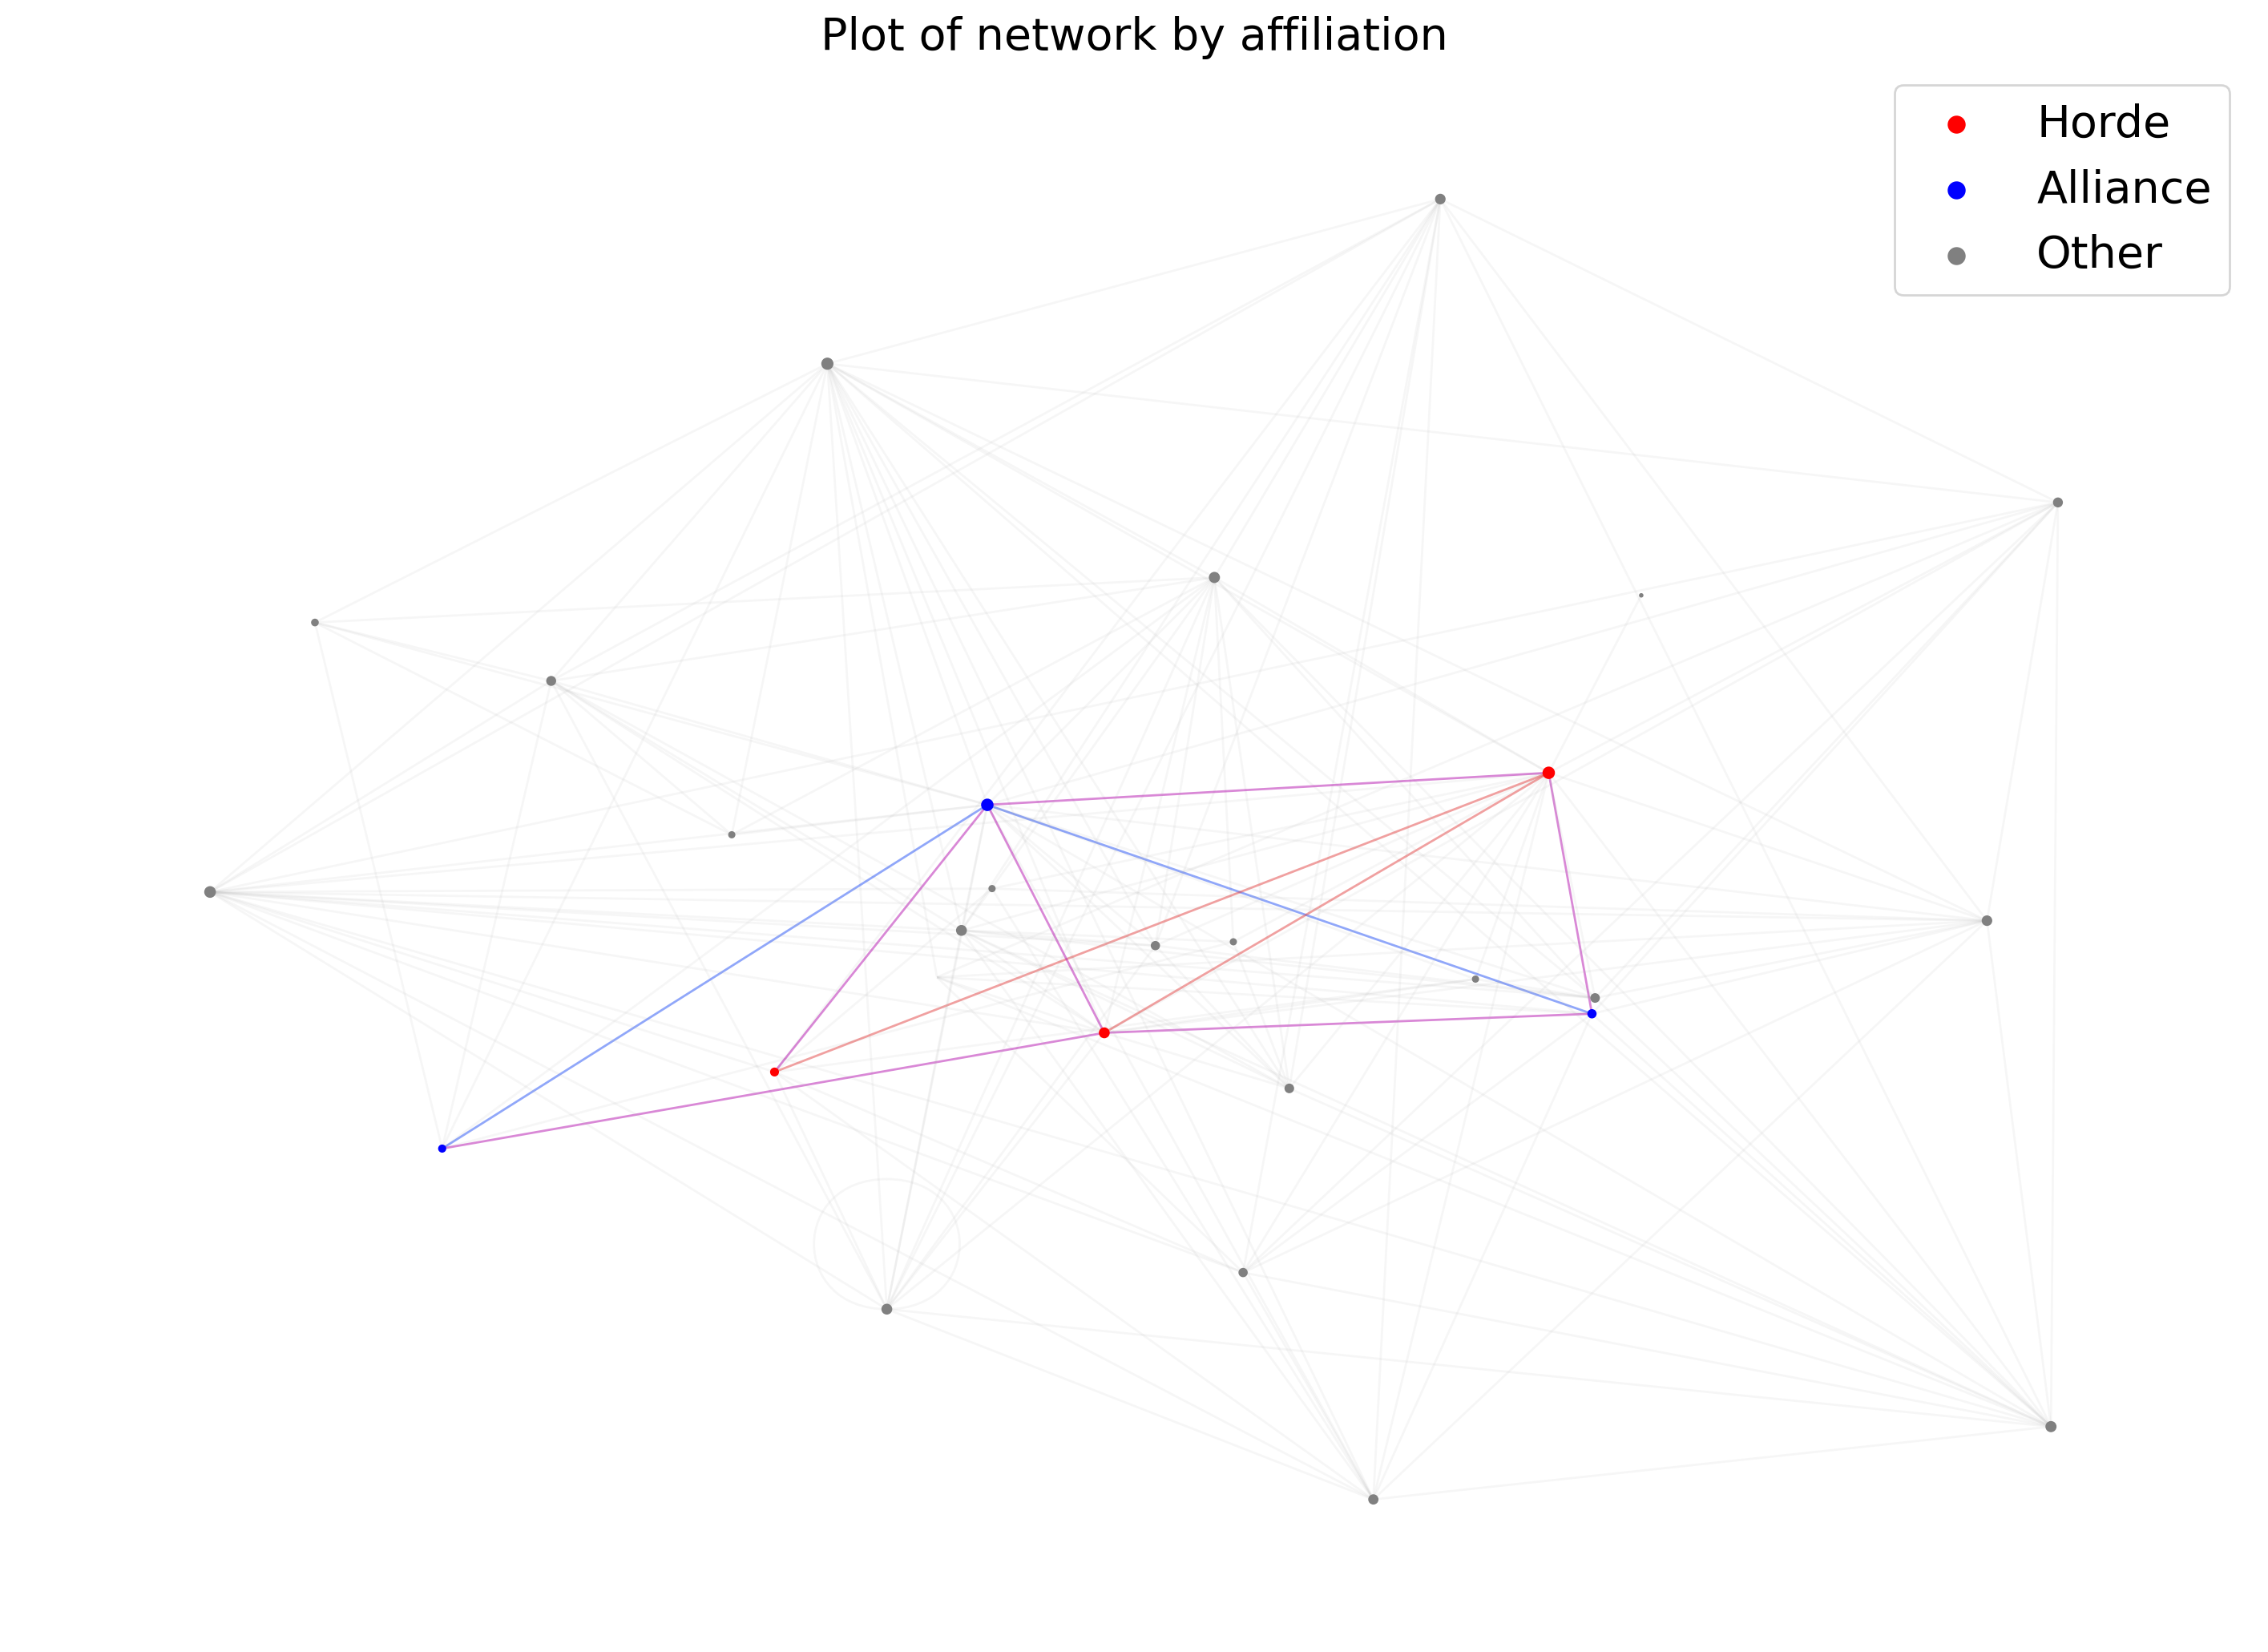

In [126]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.1,
                        strongGravityMode=False,
                        gravity=10.0,

                        # Log
                        verbose=True)

fig = plt.figure(figsize=(18,13), dpi=200)
plt.title("Plot of network by affiliation", fontsize=20)
positions = forceatlas2.forceatlas2_networkx_layout(GWC1, pos=None, iterations=500)

nx.draw_networkx_nodes(GWC1, positions, node_size=[GWC1.degree()[node] for node in nodeAtsDict['Horde']], nodelist=nodeAtsDict['Horde'], node_color='red', label='Horde')
nx.draw_networkx_nodes(GWC1, positions, node_size=[GWC1.degree()[node] for node in nodeAtsDict['Alliance']], nodelist=nodeAtsDict['Alliance'], node_color='blue', label='Alliance')
nx.draw_networkx_nodes(GWC1, positions, node_size=[GWC1.degree()[node] for node in nodeAtsDict['Other']], nodelist=nodeAtsDict['Other'], node_color='grey', label='Other')
 
# nx.draw_networkx_labels(GWC1, positions, {'Thrall':'Thrall','Garrosh_Hellscream':'Garrosh_Hellscream'}, font_size=16, font_color='r')
# nx.draw_networkx_labels(GWC1, positions, {'Jaina_Proudmoore':'Jaina_Proudmoore'}, font_size=16, font_color='b')

nx.draw_networkx_edges(GWC1, positions, edge_color=edge_color, alpha=edge_alpha)


plt.axis('off')
lgnd = plt.legend(prop={'size': 20})
for handle in lgnd.legendHandles:
    handle.set_sizes([50.0])
plt.show()

## Communites over time

In [127]:
def computeModularity(G, partition):
    #Here the partition input is an attribute that we will partition the data set by
    partitions = np.unique(list(nx.get_node_attributes(G,partition).values()))
    partition_dic = {part: [] for part in partitions}
    
    N = len(G.nodes())
    L = len(G.edges())
    
    modularity = 0
    #sort nodes into their respective communities
    for key in partition_dic.keys():
        for node in G.nodes():
            part = G.nodes[node][partition]
            partition_dic[part].append(node)
        community = nx.Graph.subgraph(G, partition_dic[key])
        k_c = sum([G.degree(v) for v in community])
        L_c = len(community.edges())

        #compuute modularity
        modularity += (L_c / L) - (k_c/(2*L))**2
        
    return modularity
print("Modularity score affiliation partition:", round(computeModularity(GWC1,'Affiliation'),4))

KeyError: 0

In [136]:
import community


part = community.best_partition(GWC1) # uncommented so we get the same partition when loading

for node in GWC1.nodes():
    GWC1.nodes()[node]['louvain'] = part[node]

In [99]:
modularity = computeModularity(GWC1, 'louvain')
print("Modularity score Louvain partition:", round(modularity,4))

Modularity score Louvain partition: 0.2558


In [103]:
GWC1.nodes('louvain')

NodeDataView({'Kalecgos': 0, 'Varian_Wrynn': 1, 'Marwyn': 1, 'Lady_Liadrin': 3, 'Ursoc': 0, 'Darion_Mograine': 1, 'Terenas_Menethil_II': 1, 'Broll_Bearmantle': 2, 'Loken': 0, 'Ursol': 0, "Kel'Thuzad": 1, "A'dal": 1, 'Eitrigg': 3, 'Valeera_Sanguinar': 2, 'Bolvar_Fordragon': 1, 'Falric': 1, 'Yogg-Saron': 0, 'Rhonin': 0, 'Galakrond': 0, 'Malygos': 0, 'Deathwing': 0, 'Aethas_Sunreaver': 3, 'Nozdormu': 0, 'Thassarian': 1, 'Varok_Saurfang': 3, 'Thorim': 0, 'Illidan_Stormrage': 1, 'Uther_the_Lightbringer': 1, 'Archmage_Arugal': 1, 'Lich_King': 1, "Mal'Ganis": 1, 'Master_Apothecary_Faranell': 1, 'Hodir': 0, 'Vereesa_Windrunner': 3, 'Varimathras': 1, 'Chronormu': 0, 'Algalon_the_Observer': 0, 'Muradin_Bronzebeard': 1, 'Vindicator_Maraad': 2, 'Alexandros_Mograine': 1, 'Thrall': 2, 'Annhylde_the_Caller': 1, 'Grand_Magister_Rommath': 3, 'Anasterian_Sunstrider': 3, 'Velen': 2, 'Tirion_Fordring': 1, 'Grand_Apothecary_Putress': 1, 'Llane_Wrynn_I': 0, 'Brann_Bronzebeard': 0, 'Sylvanas_Windrunner': 3, 

In [116]:
# parameters for nx.draw

degrees = [d[1] for d in nx.degree(GWC1)]
color_map = []
hex_cols = []

# from https://stackoverflow.com/questions/13998901/generating-a-random-hex-color-in-python
r = lambda: random.randint(0,255)
for i in range(len(np.unique(list(partition.values())))):
    hex_col = '#%02X%02X%02X' % (r(),r(),r())
    hex_cols.append(hex_col)

for com in partition.values():
    color_map.append(hex_cols[com])

In [117]:
nodeAtsList = []
for i in range(len(np.unique(list(partition.values())))):
    nodesByAts = [x for x,y in GWC1.nodes(data=True) if y['louvain']==i]
    nodeAtsList.append(nodesByAts)

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 622.21it/s]


BarnesHut Approximation  took  0.15  seconds
Repulsion forces  took  0.51  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


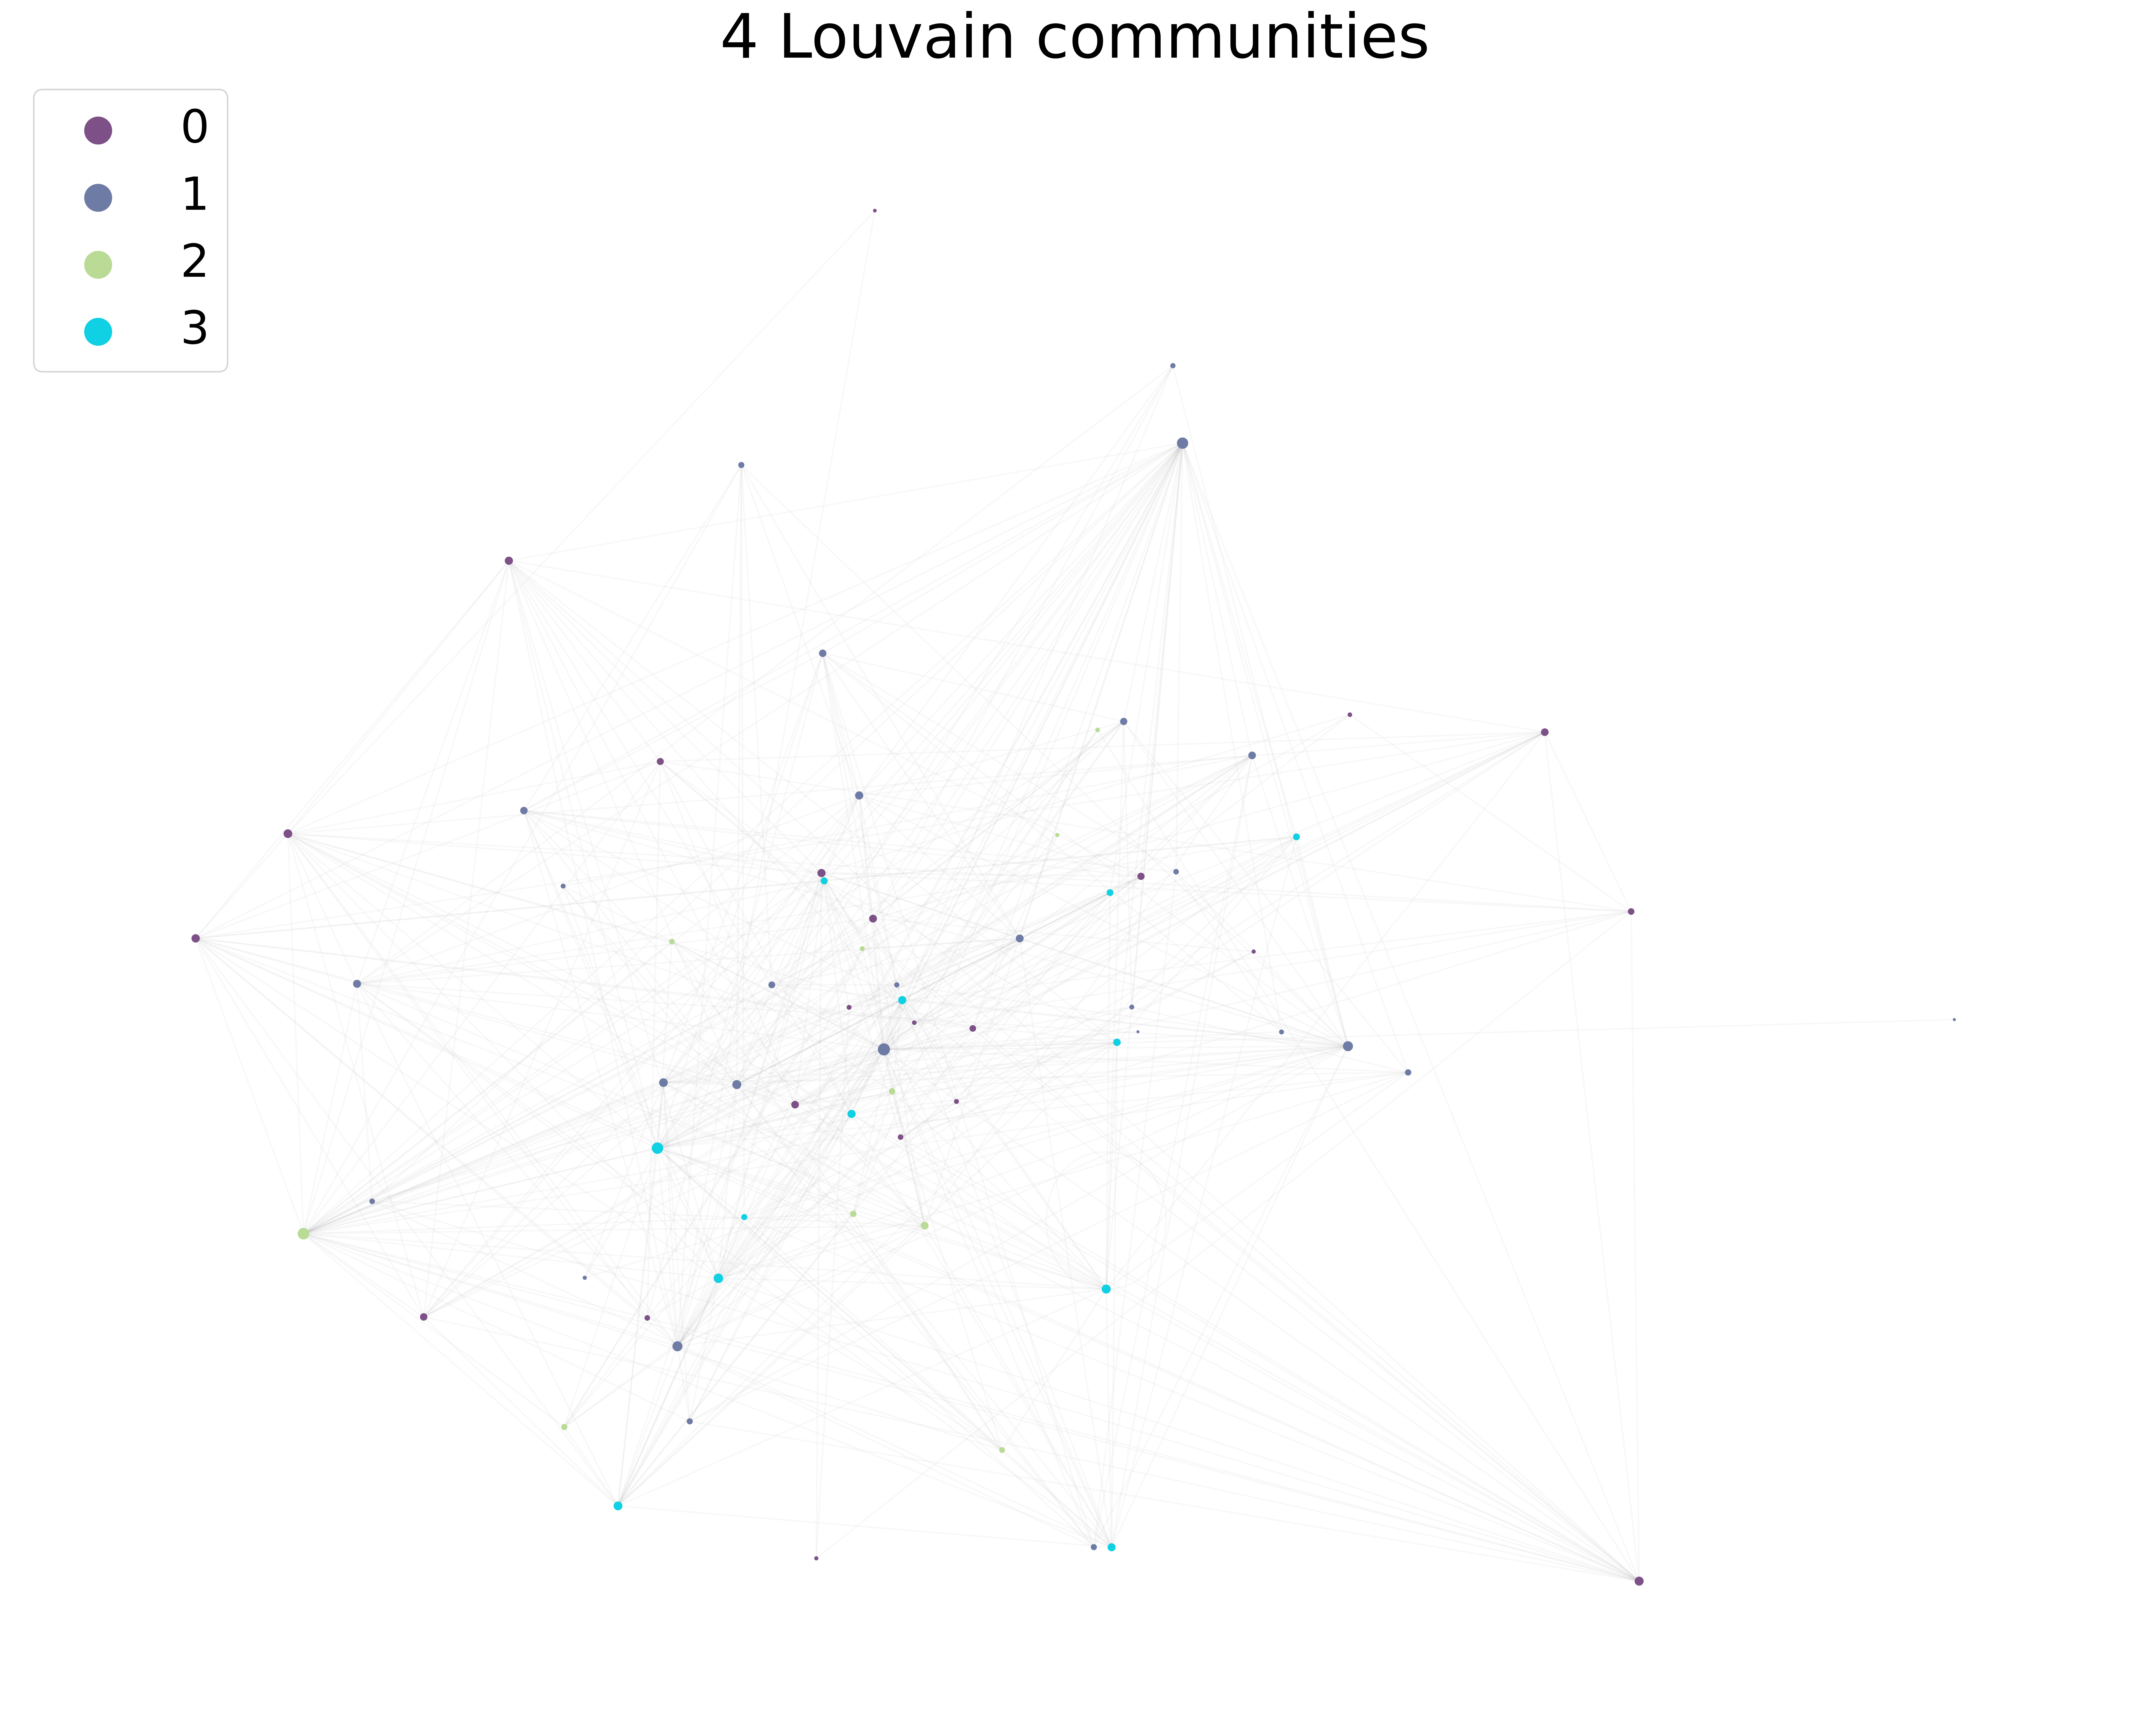

In [120]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.1,
                        strongGravityMode=False,
                        gravity=30.0,

                        # Log
                        verbose=True)


fig = plt.figure(figsize=(25,20), dpi=400)
positions = forceatlas2.forceatlas2_networkx_layout(GWC1, pos=None, iterations=500)

# create the legend for each Louvain attribute
for i in range(len(np.unique(list(partition.values())))):
    nx.draw_networkx_nodes(GWC1, positions, node_size=[GWC1.degree()[node] for node in nodeAtsList[i]]
                           , nodelist = nodeAtsList[i], node_color=hex_cols[i], label = str(i))

# nx.draw_networkx_labels(GWC1, positions, {'Captain_America':'Captain America', 'Iron_Man':'Iron Man'}, font_size=16, font_color='r')

nx.draw_networkx_edges(GWC1, positions, edge_color="grey", alpha=0.05)
plt.title("{} Louvain communities".format(len(np.unique(list(partition.values())))), fontsize=40)
lgnd = plt.legend(prop = {'size':30}, loc="upper left")

for handle in lgnd.legendHandles:
    handle.set_sizes([300.0])

plt.axis('off')
plt.show()

## Sentiment over time


In [43]:
#Load LabMT word list as dataframe:
df_happy = pd.read_csv('Data_Set_S1.txt', skiprows=2, sep="\t")

In [44]:
def text2sentiment_freqdist(freqdist_dic):
    
    # total happiness score
    happiness_score = 0
    # total count of tokens included in the sentiment score
    w = 0
    
    # iterate over tokens in freqdist
    for token in freqdist_dic.keys():
        # check if token is in the dataframe
        if token in list(df_happy['word']):
            token = token.lower()
            
            # get sentiment score of word and multiply it with how many times it appears in the text 
            score = float(df_happy.loc[df_happy['word'] == token]['happiness_average'])
            happiness_score += freqdist_dic[token]*score
            
            # add how many times the token appears to total count
            w += freqdist_dic[token]
    
    # if total token count is 0, return 0. Else divide total happiness score with total token count
    if w == 0:
           return 0
    else:
        return happiness_score / w

In [45]:

for i, name in enumerate(tqdm(df_text['Name'])):   
    if name in DG.nodes():
        # tokenize text from character page and turn into FreqDist dictionary
        tokens = df_text['Clean Text'].iloc[i].split()
        freqdist_dic = nltk.FreqDist(tokens)
        
        # assign sentiment score as new attribute 
        sentiment_score = text2sentiment_freqdist(freqdist_dic)
        DG.nodes()[name]['sentiment'] = sentiment_score

100%|██████████████████████████████████████████████████████████████████████████████| 2485/2485 [37:08<00:00,  1.12it/s]


In [62]:
#Find all Horde and Alliance characters
Horde = df_text[df_text.Affiliation=='Horde']['Name']
Alliance = df_text[df_text.Affiliation=='Alliance']['Name']

games = ['WC1','WC2','WC2X','WC3','WC3X','WoW','WoWBC','WoWWotLK','WoWC','WoWMoP','WoWWoD','WoWL','WoWBfA','WoWS','WoWD']

games_sent = {}
games_sent_horde = {}
games_sent_alliance = {}
for game in tqdm(games):
    h = []
    a = []
    for name in Horde:
        if name in df_meta[df_meta[game]==1].Name.values:
            h.append(DG.nodes()[name]['sentiment'])
    games_sent_horde[game]=np.mean(h)
    for name in Alliance:
        if name in df_meta[df_meta[game]==1].Name.values:
            a.append(DG.nodes()[name]['sentiment'])
    games_sent_alliance[game]=np.mean(a)
games_sent = {'Horde':games_sent_horde, 'Alliance':games_sent_alliance}


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00, 12.00it/s]


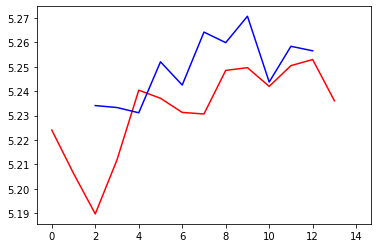

In [74]:

plt.plot(games_sent['Horde'].values(),'r')
plt.plot(games_sent['Alliance'].values(),'b')
plt.show()

In [78]:
filepath = os.getcwd()
with open(filepath+'\\DG_sent.pickle', 'wb') as handle:
    pickle.dump(DG, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [88]:
df_meta[df_meta['WC2']==1].Name.values

array(['Anduin_Lothar', 'Terenas_Menethil_II', 'Uther_the_Lightbringer',
       'Aiden_Perenolde', 'Thoras_Trollbane', "Cho'gall", "Gul'dan",
       'Orgrim_Doomhammer', 'Kilrogg_Deadeye', 'Zuluhed_the_Whacked',
       'Tagar_Spinebreaker', "Zul'jin"], dtype=object)

In [87]:
DG.nodes()['Anduin_Lothar']

{'Race': 'Human', 'Affiliation': 'Other'}